# Standard Data Analysis
1. ooo
2. sss

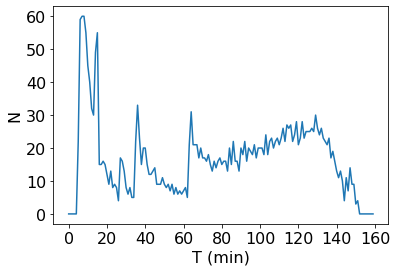

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Sp=   # Start Point
#Ep=   # End Point

f = open('./data/0109/UV.txt', 'r')          # Open file

# file 
column0=[]
columnT=[]                       # Data of time
column1=[]                       # Data of UV300
column2=[]                       # Data of UV340
column3=[]                       # Data of UV400
column4=[]                       # Data of OnOff


# file 
for line in iter(f):
    data=line.split()            # Data 用 space 隔開
    str0=float(data[5])          # Time (Sec)
    str1=float(data[2])          
    str2=float(data[1])
    str3=float(data[0])
    str4=float(data[4])

    column0.append(str0)         # Data of Time
    column1.append(str1)         # Data of UV300
    column2.append(str2)         # Data of UV340
    column3.append(str3)         # Data of UV550
    column4.append(str4)

O=np.array(column4)    
    
T=column0[0]


# Overnight Problem
for line in column0:
    if line-T < 0:
        line=line+86399                # Overnight
        columnT.append((line-T))       # Data of Time from 0
    else:
        columnT.append((line-T))       # Data of Time from 0
    
X=[]
Y=[]
for i in range(160):                     #
    A=O[(0)+60*i:(60)+60*i]
    #A=O[(180)+120*i:(240)+120*i]
    B=sum(A)
    #B[i]=A
    Y.append(A)
    X.append(B)

Y=np.array(Y)

# Pandas
df=pd.DataFrame(Y)
df1 = pd.DataFrame(df.sum(axis=1), columns = ['Sum'])
df2=pd.concat([df,df1],axis=1)
#df3=df2.loc[df2['Sum']> 10]
#print(len(df3))
df2.to_excel('./data/0109/N.xlsx')

df3=df2.loc[df2['Sum']> 20]
df3.to_excel('./data/0109/N20.xlsx')

t=[]
for i in range(len(Y)):
    #print(i)
    t.append(i)         # hr /60

plt.plot(t,X)
#plt.plot(t,Z)

#  x軸和 y軸的 label 以及title
plt.xlabel("T (min)", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("N", fontsize=16)
plt.yticks(fontsize=16)
#plt.title("Exp 10/20", fontsize=16)

#plt.legend(loc='upper left', fontsize=16) # legend
plt.show()